In [1]:
import pandas as pd

# Load the CSV files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Get the shape of the data
train_shape = train_df.shape
test_shape = test_df.shape

# Get the data types of the columns
train_dtypes = train_df.dtypes
test_dtypes = test_df.dtypes

# Display the results
print("Train Dataset Shape:", train_shape)
print("Test Dataset Shape:", test_shape)
print("\nTrain Dataset Data Types:\n", train_dtypes)
print("\nTest Dataset Data Types:\n", test_dtypes)


Train Dataset Shape: (20758, 18)
Test Dataset Shape: (13840, 17)

Train Dataset Data Types:
 id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Test Dataset Data Types:
 id                                  int64
Gender                             object
Age                       

In [2]:
train_missing_values = train_df.isnull().sum()
test_missing_values = test_df.isnull().sum()

# Display the missing values
print("Missing Values in Train Dataset:\n", train_missing_values)
print("\nMissing Values in Test Dataset:\n", test_missing_values)

Missing Values in Train Dataset:
 id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Missing Values in Test Dataset:
 id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC               

**Do the EDA in more detail than usual and explain the results

In [3]:
# Summary statistics for numerical features
train_summary = train_df.describe()
test_summary = test_df.describe()

train_summary, test_summary


(                id           Age        Height        Weight          FCVC  \
 count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
 mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
 std     5992.46278      5.688072      0.087312     26.379443      0.533218   
 min        0.00000     14.000000      1.450000     39.000000      1.000000   
 25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
 50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
 75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
 max    20757.00000     61.000000      1.975663    165.057269      3.000000   
 
                 NCP          CH2O           FAF           TUE  
 count  20758.000000  20758.000000  20758.000000  20758.000000  
 mean       2.761332      2.029418      0.981747      0.616756  
 std        0.705375      0.608467      0.838302      0.602113  
 min        1.000000      1

In [4]:
# Categorical features in the train dataset
categorical_features = train_df.select_dtypes(include=['object']).columns

# Display value counts for each categorical feature
for feature in categorical_features:
    print(train_df[feature].value_counts())
    print()


Gender
Female    10422
Male      10336
Name: count, dtype: int64

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

FAVC
yes    18982
no      1776
Name: count, dtype: int64

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

SMOKE
no     20513
yes      245
Name: count, dtype: int64

SCC
no     20071
yes      687
Name: count, dtype: int64

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64



In [5]:
# Distribution of the target variable
target_distribution = train_df['NObeyesdad'].value_counts()
target_distribution


NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

Correlation Matrix

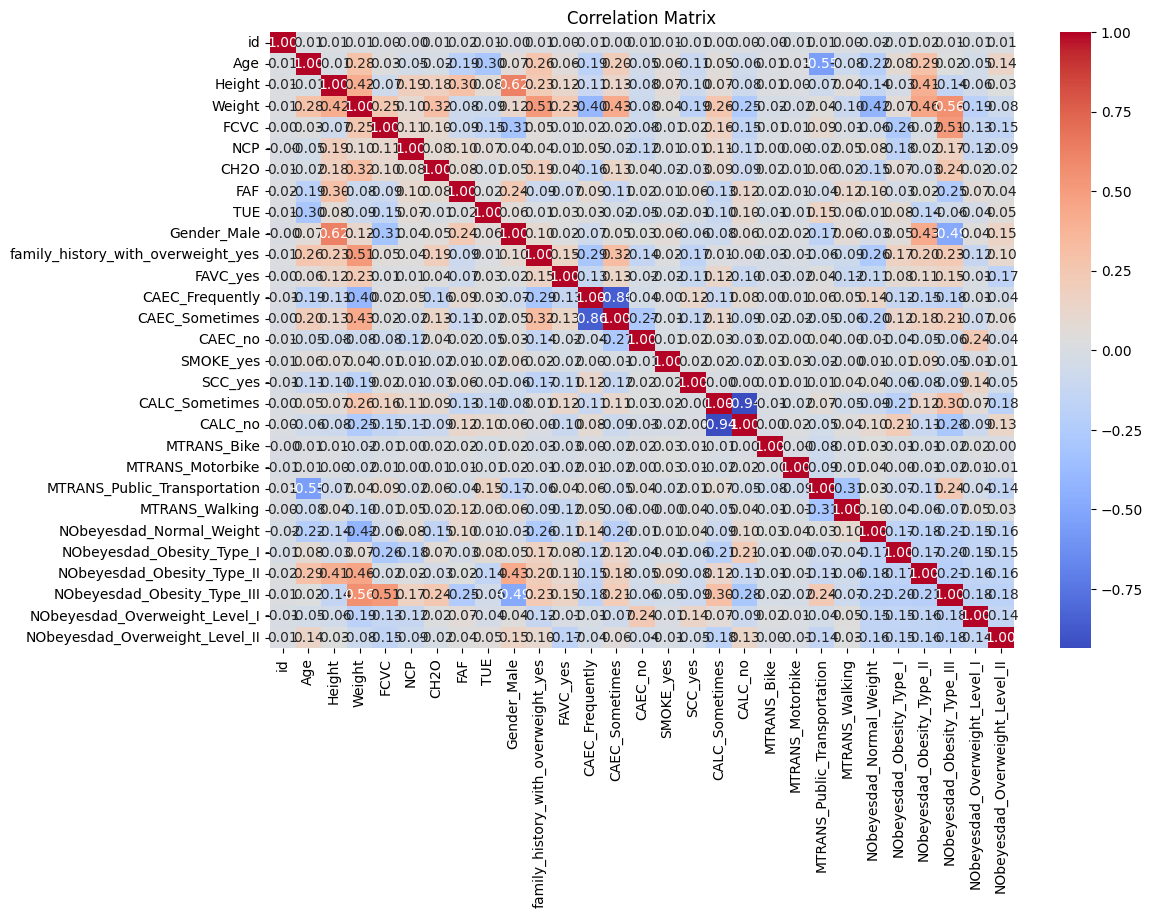

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Convert categorical variables to dummy/indicator variables
train_df_encoded = pd.get_dummies(train_df, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = train_df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

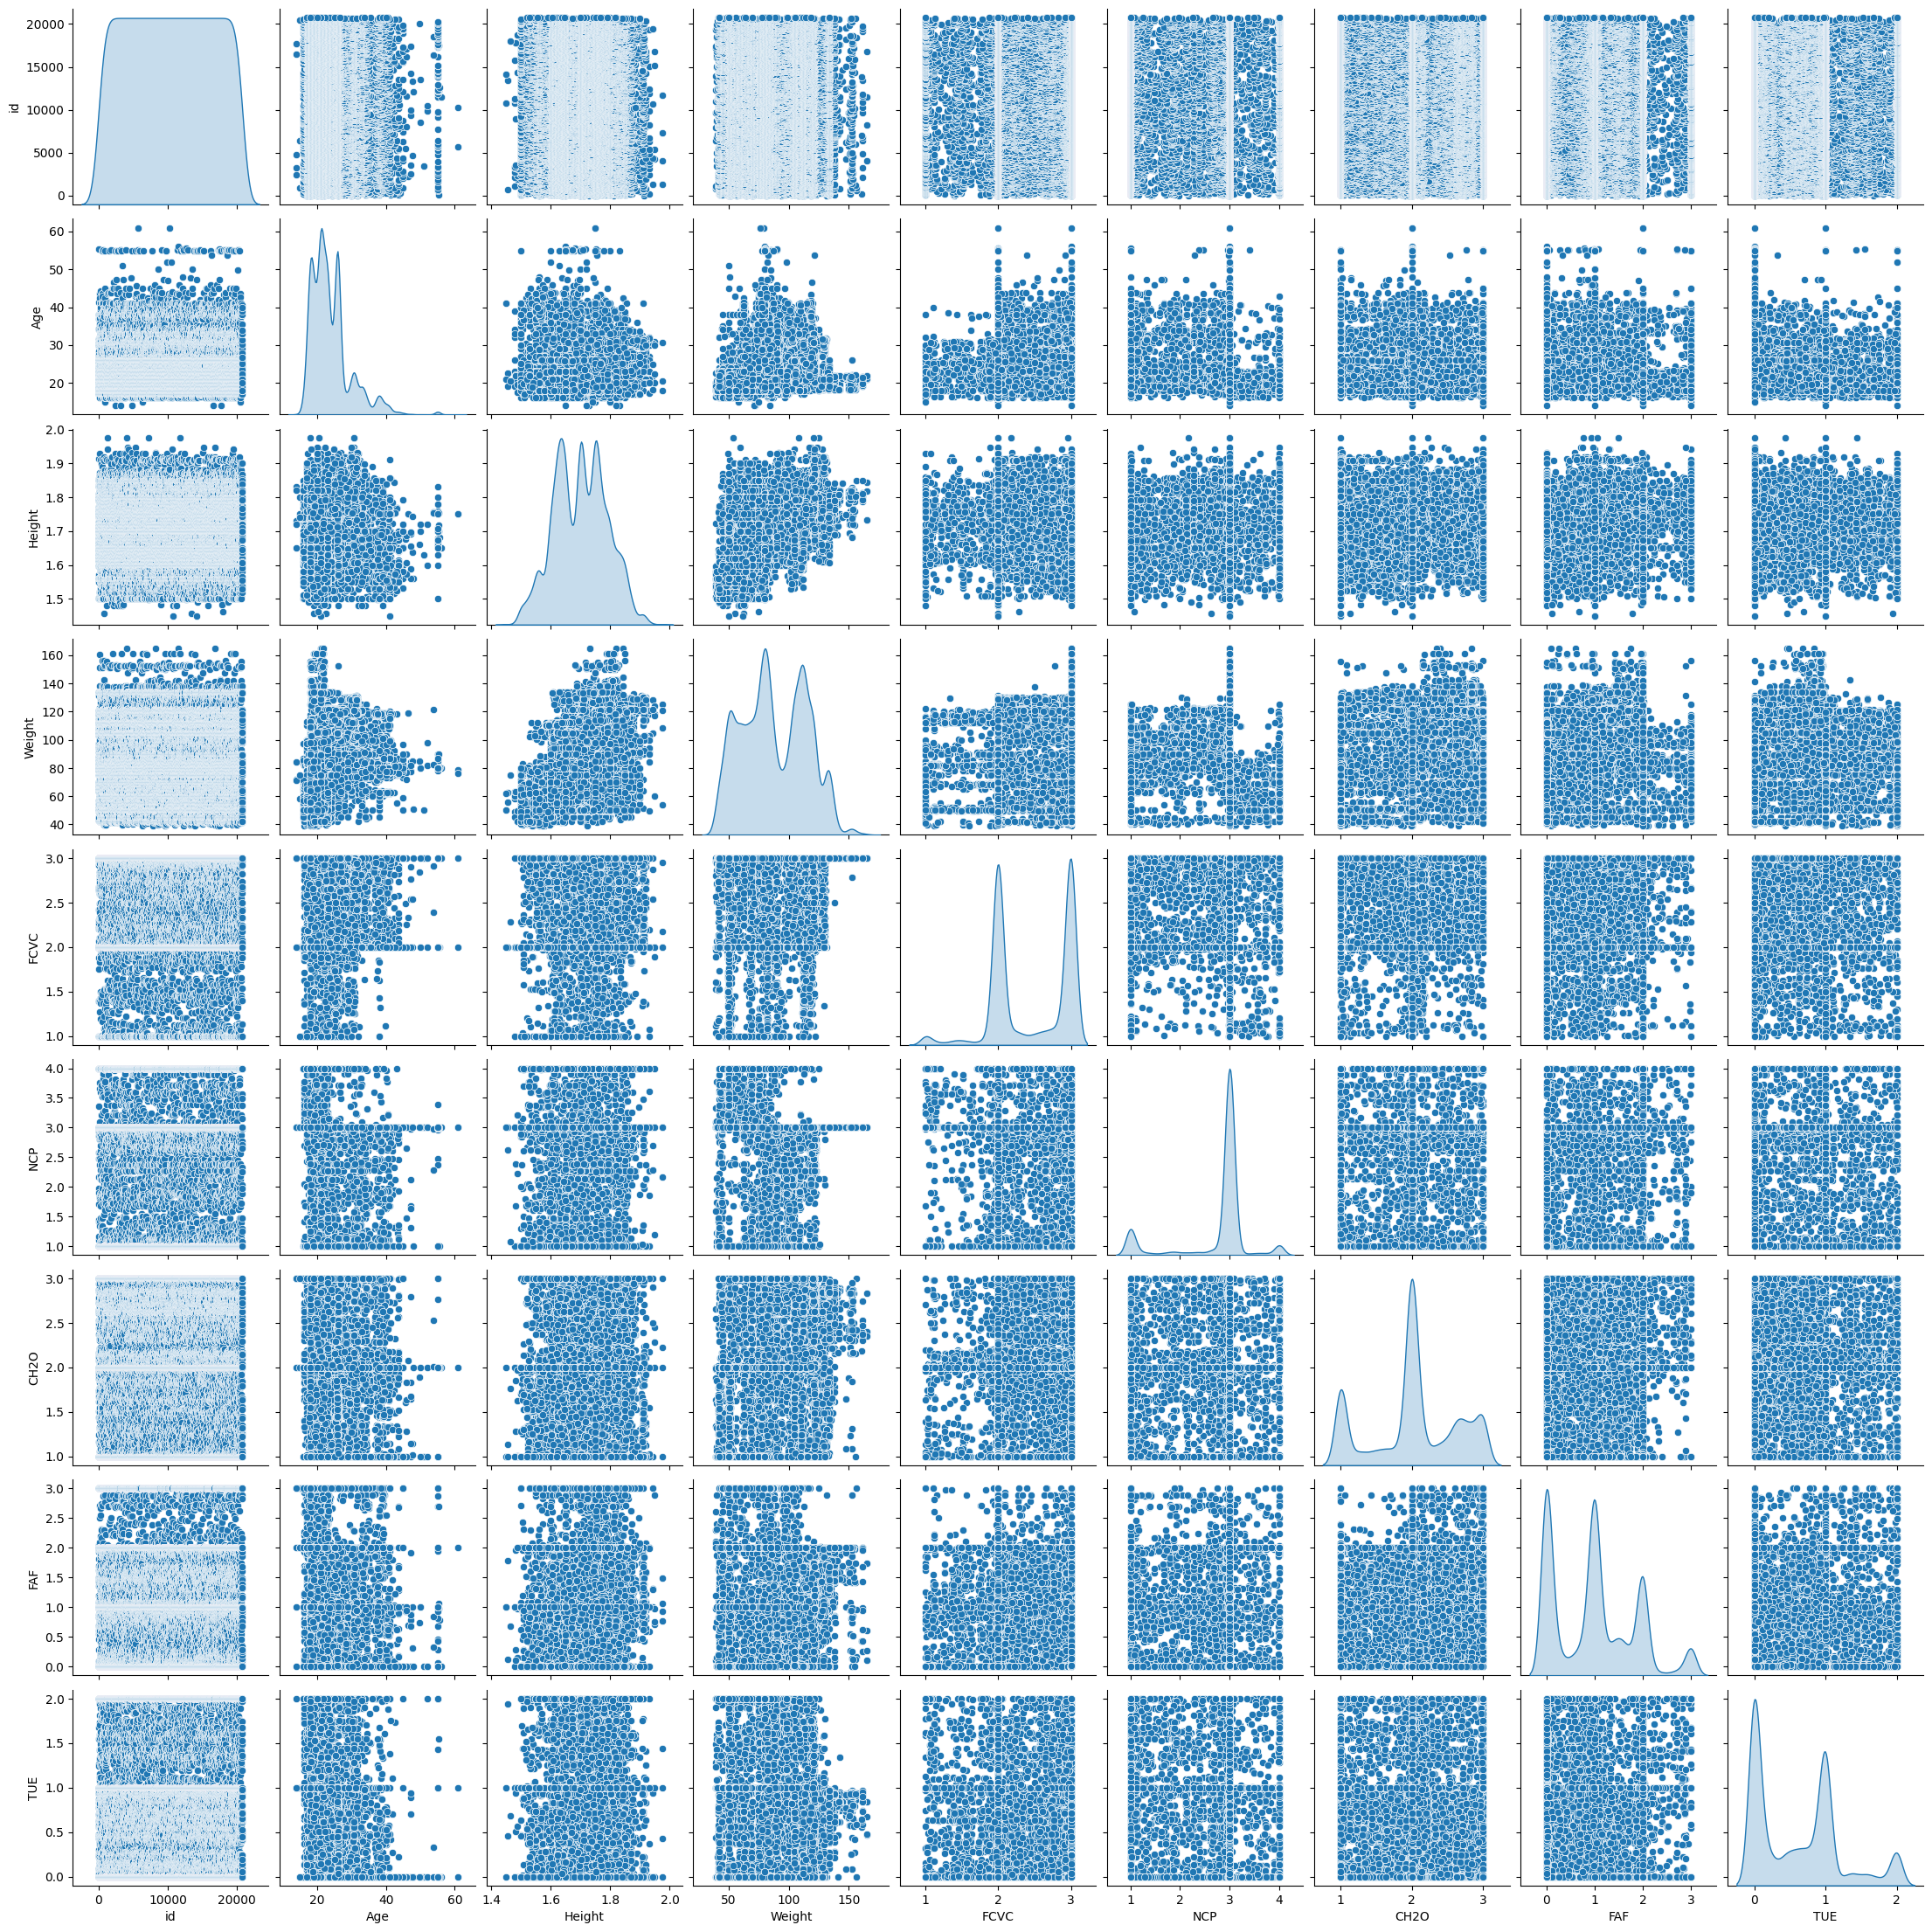

In [7]:
sns.pairplot(train_df, diag_kind='kde')
plt.show()


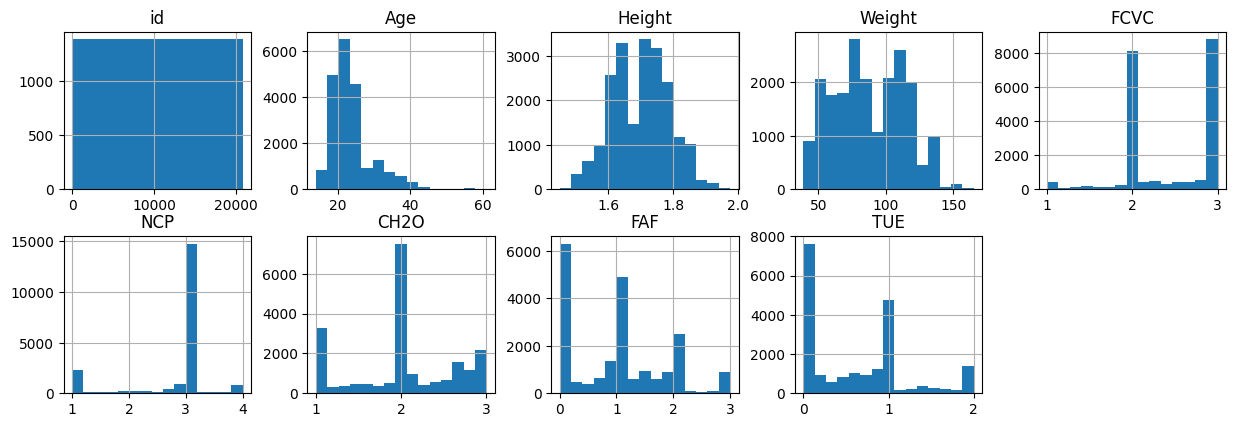

In [8]:
numerical_features = train_df.select_dtypes(include=['float64', 'int64']).columns

train_df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(4, 5))
plt.show()


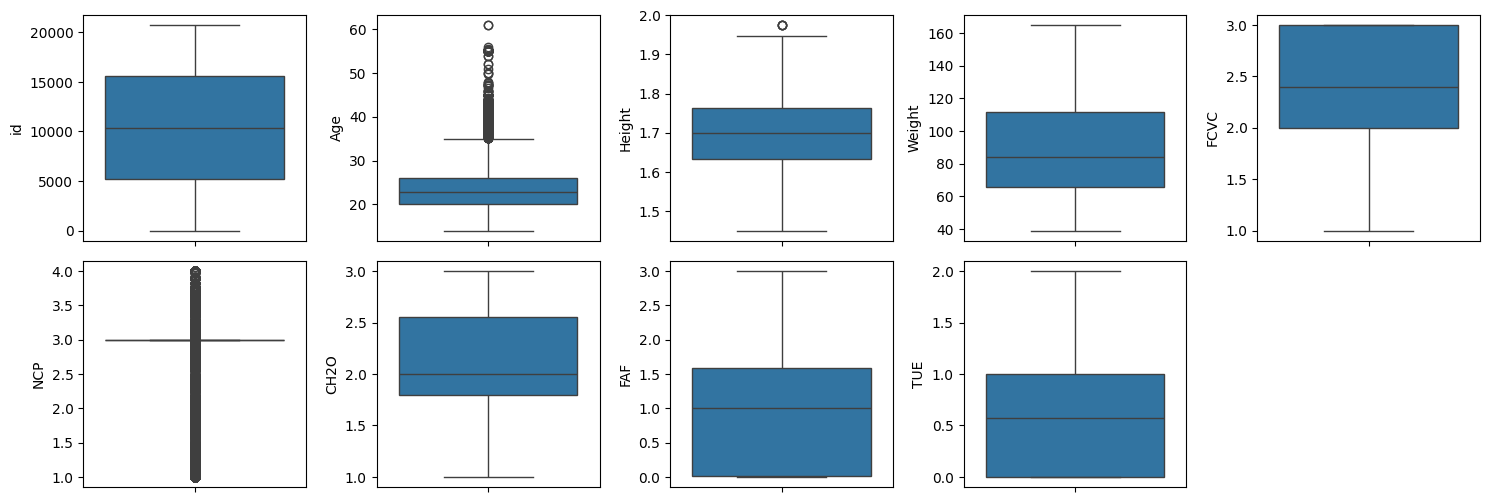

In [9]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 5, i+1)
    sns.boxplot(train_df[feature])
plt.tight_layout()
plt.show()


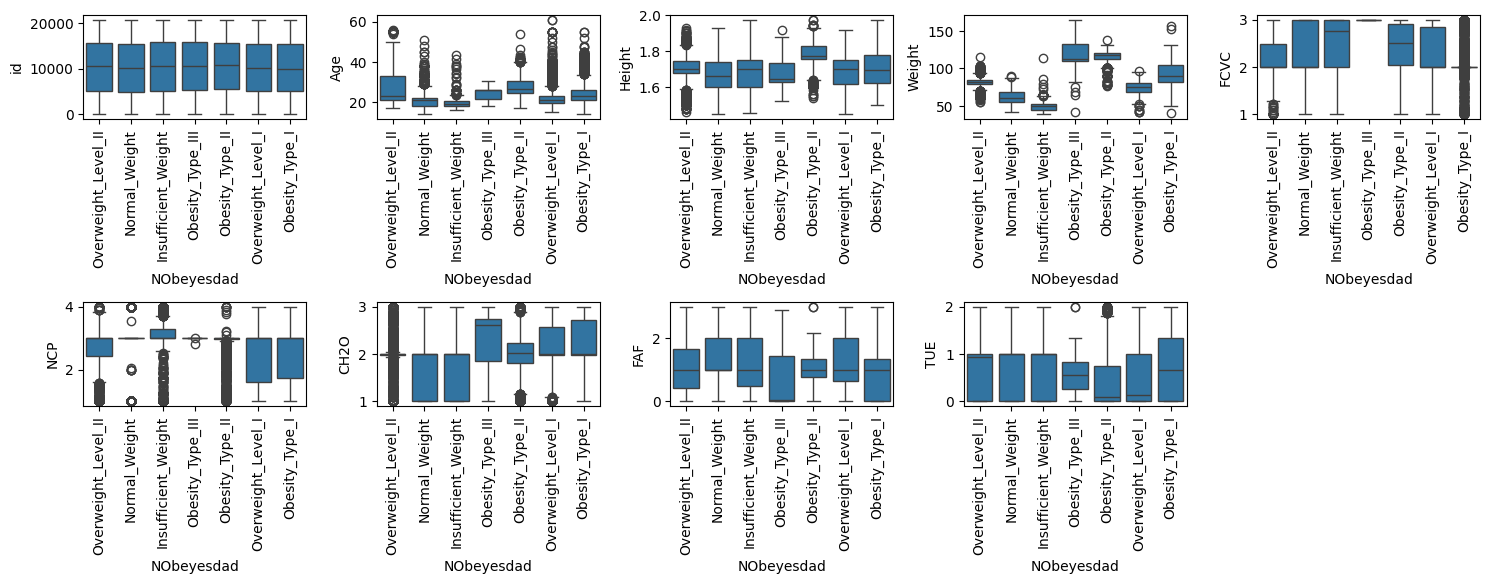

In [10]:
# Box plots of numerical features vs. target variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x='NObeyesdad', y=feature, data=train_df)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# Separate features and target variable from the train dataset
X = train_df.drop('NObeyesdad', axis=1)
y = train_df['NObeyesdad']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_report = classification_report(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Classification Report:\n", log_reg_report)


Logistic Regression Accuracy: 0.8651252408477842
Logistic Regression Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.88      0.93      0.91       524
      Normal_Weight       0.85      0.80      0.82       626
     Obesity_Type_I       0.81      0.84      0.83       543
    Obesity_Type_II       0.96      0.97      0.96       657
   Obesity_Type_III       0.99      1.00      1.00       804
 Overweight_Level_I       0.73      0.72      0.73       484
Overweight_Level_II       0.73      0.69      0.71       514

           accuracy                           0.87      4152
          macro avg       0.85      0.85      0.85      4152
       weighted avg       0.86      0.87      0.86      4152



In [14]:
# Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_report)


SVM Accuracy: 0.8547687861271677
SVM Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.90      0.90      0.90       524
      Normal_Weight       0.79      0.81      0.80       626
     Obesity_Type_I       0.84      0.83      0.83       543
    Obesity_Type_II       0.96      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.68      0.69      0.69       484
Overweight_Level_II       0.71      0.68      0.70       514

           accuracy                           0.85      4152
          macro avg       0.84      0.84      0.84      4152
       weighted avg       0.85      0.85      0.85      4152



In [15]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)


Random Forest Accuracy: 0.888728323699422
Random Forest Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.90      0.92       524
      Normal_Weight       0.82      0.88      0.85       626
     Obesity_Type_I       0.89      0.86      0.87       543
    Obesity_Type_II       0.97      0.98      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.77      0.74      0.76       484
Overweight_Level_II       0.77      0.77      0.77       514

           accuracy                           0.89      4152
          macro avg       0.88      0.88      0.88      4152
       weighted avg       0.89      0.89      0.89      4152



In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score



# Separate features and target variable from the train dataset
X = train_df.drop('NObeyesdad', axis=1)
y = train_df['NObeyesdad']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [18]:
# Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg, average='weighted')

# SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')

# Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')

(conf_matrix_log_reg, log_reg_accuracy, log_reg_precision,
 conf_matrix_svm, svm_accuracy, svm_precision,
 conf_matrix_rf, rf_accuracy, rf_precision)


(array([[488,  34,   0,   0,   0,   1,   1],
        [ 63, 503,   0,   0,   0,  53,   7],
        [  2,   0, 456,  23,   5,  11,  46],
        [  0,   0,  15, 639,   0,   0,   3],
        [  0,   0,   0,   1, 802,   1,   0],
        [  1,  47,  11,   0,   0, 350,  75],
        [  0,  10,  79,   5,   1,  65, 354]], dtype=int64),
 0.8651252408477842,
 0.8637104759313349,
 array([[469,  52,   0,   0,   0,   2,   1],
        [ 48, 505,   0,   0,   0,  58,  15],
        [  1,   2, 450,  16,   1,  23,  50],
        [  0,   0,  14, 639,   0,   0,   4],
        [  0,   0,   1,   2, 800,   1,   0],
        [  2,  63,  13,   0,   0, 336,  70],
        [  0,  21,  59,   7,   0,  77, 350]], dtype=int64),
 0.8547687861271677,
 0.8547442392741177,
 array([[472,  49,   0,   0,   0,   2,   1],
        [ 30, 549,   0,   0,   0,  36,  11],
        [  2,   2, 467,  13,   1,  16,  42],
        [  0,   0,  12, 642,   0,   0,   3],
        [  0,   0,   0,   1, 802,   1,   0],
        [  1,  53,   7,   0,   

In [19]:


# Separate features and target variable from the train dataset
X = train_df.drop('NObeyesdad', axis=1)
y = train_df['NObeyesdad']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg, average='weighted')

# Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')

(conf_matrix_log_reg, log_reg_accuracy, log_reg_precision,
 conf_matrix_svm, svm_accuracy, svm_precision,
 conf_matrix_rf, rf_accuracy, rf_precision)


(array([[488,  34,   0,   0,   0,   1,   1],
        [ 63, 503,   0,   0,   0,  53,   7],
        [  2,   0, 456,  23,   5,  11,  46],
        [  0,   0,  15, 639,   0,   0,   3],
        [  0,   0,   0,   1, 802,   1,   0],
        [  1,  47,  11,   0,   0, 350,  75],
        [  0,  10,  79,   5,   1,  65, 354]], dtype=int64),
 0.8651252408477842,
 0.8637104759313349,
 array([[469,  52,   0,   0,   0,   2,   1],
        [ 48, 505,   0,   0,   0,  58,  15],
        [  1,   2, 450,  16,   1,  23,  50],
        [  0,   0,  14, 639,   0,   0,   4],
        [  0,   0,   1,   2, 800,   1,   0],
        [  2,  63,  13,   0,   0, 336,  70],
        [  0,  21,  59,   7,   0,  77, 350]], dtype=int64),
 0.8547687861271677,
 0.8547442392741177,
 array([[472,  49,   0,   0,   0,   2,   1],
        [ 30, 549,   0,   0,   0,  36,  11],
        [  2,   2, 467,  13,   1,  16,  42],
        [  0,   0,  12, 642,   0,   0,   3],
        [  0,   0,   0,   1, 802,   1,   0],
        [  1,  53,   7,   0,   

In [20]:

# Separate features and target variable from the train dataset
X = train_df.drop('NObeyesdad', axis=1)
y = train_df['NObeyesdad']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg, average='weighted')

print("Logistic Regression Confusion Matrix:\n", conf_matrix_log_reg)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Precision:", log_reg_precision)

# Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')

print("SVM Confusion Matrix:\n", conf_matrix_svm)
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)

Logistic Regression Confusion Matrix:
 [[488  34   0   0   0   1   1]
 [ 63 503   0   0   0  53   7]
 [  2   0 456  23   5  11  46]
 [  0   0  15 639   0   0   3]
 [  0   0   0   1 802   1   0]
 [  1  47  11   0   0 350  75]
 [  0  10  79   5   1  65 354]]
Logistic Regression Accuracy: 0.8651252408477842
Logistic Regression Precision: 0.8637104759313349
SVM Confusion Matrix:
 [[469  52   0   0   0   2   1]
 [ 48 505   0   0   0  58  15]
 [  1   2 450  16   1  23  50]
 [  0   0  14 639   0   0   4]
 [  0   0   1   2 800   1   0]
 [  2  63  13   0   0 336  70]
 [  0  21  59   7   0  77 350]]
SVM Accuracy: 0.8547687861271677
SVM Precision: 0.8547442392741177
Random Forest Confusion Matrix:
 [[472  49   0   0   0   2   1]
 [ 30 549   0   0   0  36  11]
 [  2   2 467  13   1  16  42]
 [  0   0  12 642   0   0   3]
 [  0   0   0   1 802   1   0]
 [  1  53   7   0   0 360  63]
 [  0  19  39   5   0  53 398]]
Random Forest Accuracy: 0.888728323699422
Random Forest Precision: 0.8893394875919044

In [21]:


# Separate features and target variable from the train dataset
X = train_df.drop('NObeyesdad', axis=1)
y = train_df['NObeyesdad']

# Convert categorical variables to dummy/indicator variables for both train and test data
X = pd.get_dummies(X, drop_first=True)
X_test_full = pd.get_dummies(test_df, drop_first=True)

# Ensure both train and test data have the same dummy variables
X_test_full = X_test_full.reindex(columns=X.columns, fill_value=0)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test_full = scaler.transform(X_test_full)

# Train Random Forest on the full training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y)

# Make predictions on the test data
test_pred_labels = rf.predict(X_test_full)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'id': test_df['id'],
    'NObeyesdad': test_pred_labels
})
submission.to_csv('submission.csv', index=False)

print("Prediction and submission file creation completed successfully.")

Prediction and submission file creation completed successfully.
